In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
import glob
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
import seaborn as sns
pd.options.mode.chained_assignment = None
style.use('ggplot') or plt.style.use('ggplot')


In [21]:
# Read in anisotropy data (note: this is cross-section at z=0)

df = pd.read_csv('../ModelOutputData/TimeStep05.csv')
df.columns

Index(['pressure', 'dsdt', 'ds', 'fluxinit', 'mesh velocity', 'mesh change',
       'stress 1', 'stress 2', 'stress 3', 'stress 4', 'stress 5', 'stress 6',
       'distance', 'zs', 'zs residual', 'zs accumulation', 'zb', 'zb residual',
       'zb accumulation', 'groundedmask', 'temp', 'temp homologous',
       'temp residual', 'depth', 'd 1', 'd 2', 'd 3', 'd 4', 'd 5', 'd 6',
       'w 1', 'w 2', 'w 3', 'a2 1', 'a2 2', 'a2 3', 'a2 4', 'a2 5', 'a2 6',
       'w', 'vx', 'vy', 'zs0', 'zb0', 'tsurf', 'height', 'smb', 'sea level',
       'normal vector:0', 'normal vector:1', 'normal vector:2', 'fwater:0',
       'fwater:1', 'fwater:2', 'velocity:0', 'velocity:1', 'velocity:2',
       'stress vector:0', 'stress vector:1', 'stress vector:2', 'Points:0',
       'Points:1', 'Points:2'],
      dtype='object')

In [22]:
# Interpolate the unstructured anisotropy data onto a regular grid

xmin, xmax = min(df['Points:0']), max(df['Points:0'])
ymin, ymax = min(df['Points:1']), max(df['Points:1'])
dist = 100
nx, ny = int((xmax - xmin)/dist + 1), int((ymax - ymin)/dist + 1)
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
grid_x, grid_y = np.meshgrid(x, y)

axx = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 1'], (grid_x, grid_y), method='linear')
ayy = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 2'], (grid_x, grid_y), method='linear')
azz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 3'], (grid_x, grid_y), method='linear')
axy = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 4'], (grid_x, grid_y), method='linear')
axz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 5'], (grid_x, grid_y), method='linear')
ayz = scipy.interpolate.griddata((df["Points:0"], df["Points:1"]), df['a2 6'], (grid_x, grid_y), method='linear')


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_59743/2909230583.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


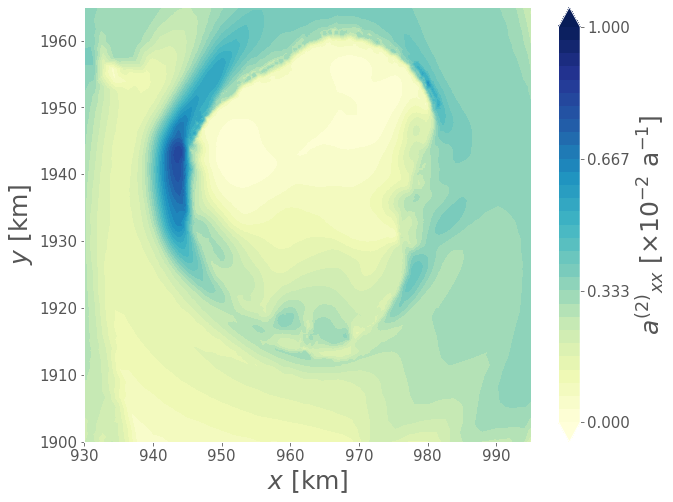

In [23]:
# Plot the x-component (a_xx) of the crystal orientation tensor 

inter = 30
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, axx, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{xx}$ [$\times 10^{-2}$ a$^{-1}$]", rotation=90, size=25)

fig.savefig('../Figures/a_xx.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_59743/2243355095.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


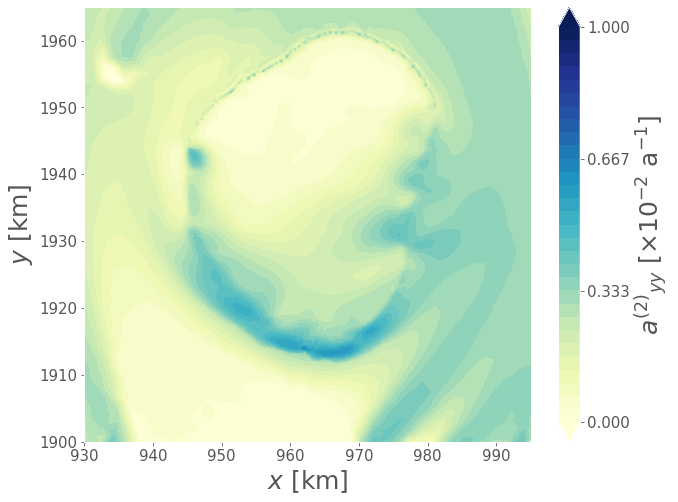

In [24]:
# Plot the y-component (a_yy) of the crystal orientation tensor 

inter = 30
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, ayy, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{yy}$ [$\times 10^{-2}$ a$^{-1}$]", rotation=90, size=25)

fig.savefig('../Figures/a_yy.jpg', format='jpg', dpi=700, bbox_inches = "tight")


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_59743/162549488.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])


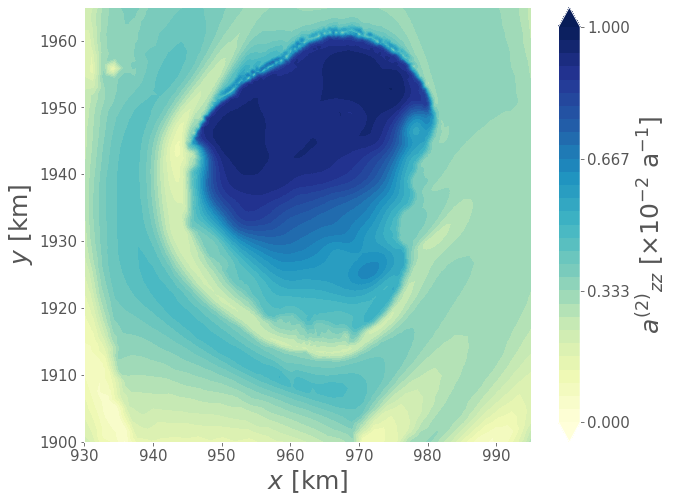

In [25]:
# Plot the vertical (a_zz) crystal orientation tensor 

inter = 30
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
CS = ax.contourf(x/1000, y/1000, azz, levels=np.linspace(0,1,31),  cmap='YlGnBu', extend = 'both')
skip = (slice(None, None, inter), slice(None, None, inter))
ax.set_xlabel(r'$x$ [km]', size=25)
ax.set_ylabel(r'$y$ [km]', size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlim(930, 995)
plt.ylim(1900, 1965)
cbar = fig.colorbar(CS, ticks=[0.0, 0.333, 0.667, 1.0])
cbar.ax.tick_params(labelsize=15)
cbar.set_label(r"${a^{(2)}}_{zz}$ [$\times 10^{-2}$ a$^{-1}$]", rotation=90, size=25)

fig.savefig('../Figures/a_zz.jpg', format='jpg', dpi=700, bbox_inches = "tight")
